# Plots for my PhD Thesis

All those plots come from my different researches. The intention is to have them coherently designed.

### Required packages

In [1]:
using PyPlot

## Plot for accuracy bound in the vicinity of Dicke states

Those plots come from an analytical formula so the data is generated on the fly.

The magnetic field is along $Y$ direction, $H=\gamma J_y$

In [2]:
# It is a function of 5 expectation values <Jx^2>, <Jz^2>, <Jx^4>, <Jz^4> and <JzJx^2Jz>, and θ.
function precision(x2,z2,x4,z4,zx2z,θ)
    variancex2 = x4 - x2^2
    variancez2 = z4 - z2^2
    ftheta = variancez2 / (variancex2 * tan(θ)^2) + tan(θ)^2
    (variancex2 * ftheta + x2 - 2 * z2 * (1 + x2) + 6 * zx2z) / (4 * (x2 - z2)^2)
end

function opttheta(x2,z2,x4,z4)
    variancex2 = x4 - x2^2
    variancez2 = z4 - z2^2
    atan((variancez2 / variancex2)^0.25)
end

precision2(x2,z2,x4,z4,n,θ) = precision(x2,z2,x4,z4,(n*(n+2)/8*z2-z4/2),θ)

optprecision(x2,z2,x4,z4,zx2z) = precision(x2,z2,x4,z4,zx2z,opttheta(x2,z2,x4,z4))

optprecision2(x2,z2,x4,z4,n) = optprecision(x2,z2,x4,z4,(n*(n+2)/8*z2-z4/2))

optprecision3(x2,z2,n) = optprecision2(x2, n^2/4 * x2, z2, 3 * z2^2, n)

optprecision3 (generic function with 1 method)

### Vectorize functions for computing the data

In [3]:
function precision(x2,z2,x4,z4,zx2z,θ::Array{Float64,1})
    outcome = Array(Float64, length(θ))
    for i in 1:length(θ)
        outcome[i] = precision(x2,z2,x4,z4,zx2z,θ[i])
    end
    outcome
end

optprecision3(x2::Array{Float64,1},z2::Array{Float64,1},n) = begin
    outcome = Array(Float64,length(x2),length(z2))
    for i in 1:length(x2)
        for j in 1:length(z2)
            outcome[i,j] = optprecision3(x2[i],z2[j],n)
        end
    end
end

optprecision3 (generic function with 2 methods)

In [4]:
methods(precision2)

# 1 method for generic function "precision2":
precision2(x2, z2, x4, z4, n, θ) at In[2]:15

### Plot evolution

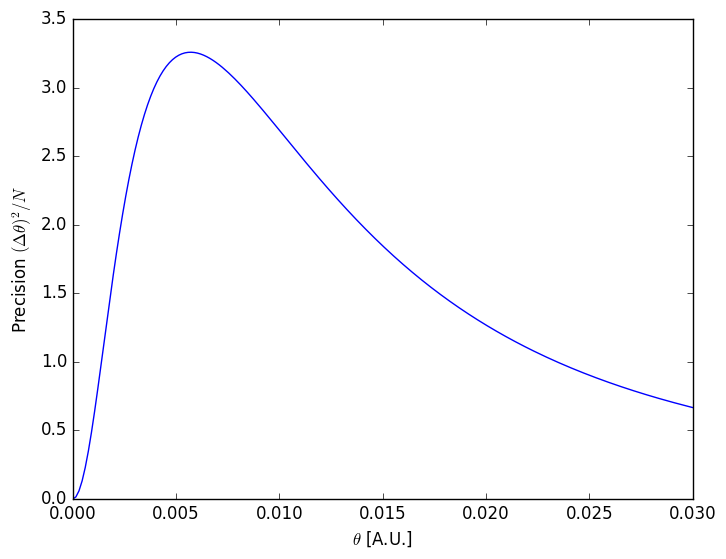

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x317e3be90>

depwarn in (depwarn::(ASCIIString, ::ASCIIString, ::Symbol)::Symbol) at ./deprecated.jl:64
 at  in ./deprecated.jlreadall:(64
:: in IOStreamreadbytes, (::Vararg{IOStream})::Base.PipeEndpoint,  at ./deprecated.jl:30
:: in Varargnpyinitialize{(Any)}) at /Users/iagoba/.julia/v0.5/PyCall/src/numpy.jl:75
 at  in ./deprecated.jl:30
PyCall in .send_streamPyObject((::Base.PipeEndpoint, ::Array{Float64,1})::ASCIIString) at /Users/iagoba/.julia/v0.5/PyCall/src/numpy.jl:180
 at  in /Users/iagoba/.julia/v0.5/IJulia/src/stdio.jlmap:(25
:: in Typewatch_stream{(PyCall.PyObject}, ::Base.PipeEndpoint, ::Tuple{Array{Float64,1},Array{Float64,1}})::ASCIIString) at ./tuple.jl:73
 at  in /Users/iagoba/.julia/v0.5/IJulia/src/stdio.jl#pycall#32:(41
:: in Array{Any,1}, (::IJulia.##6#10)(::)Any,  at ./task.jl:431
while loading In[5], in expression starting on line 12::
PyCall.PyObject, ::Type{PyCall.PyAny}, ::Array{Float64,1}, ::Vararg{Array{Float64,1}}) at /Users/iagoba/.julia/v0.5/PyCall/src/PyCall.jl:344
 [i

In [5]:
# Data
xmax=0.03
x = Array(linspace(0,xmax,200));
y = precision2(6e6, 112, 6.2e13, 4e4, 7900, x).^(-1)./7900;

# 
ylabel(L"Precision $(\Delta \theta)^2/N$")
xlabel(L"$\theta$ [A.U.]")

axis(xmin=0, xmax=xmax)

plot(x,y,linewidth=1)